In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
dataset.shape

(690, 16)

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [15]:
from minisom import MiniSom

In [14]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.6-cp36-none-any.whl size=8525 sha256=3d1a677ad3592b3d074e9319aca2c9a70b3389c38926a34057214bd0109935aa
  Stored in directory: /root/.cache/pip/wheels/b8/c6/01/330066e36e1f7c826c96f656f9185822cfcdef0591315949ea
Successfully built MiniSom


In [29]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

In [30]:
# Randomly Initialize the weights
som.random_weights_init(X)

# To train the SOM on X
som.train_random(data = X, num_iteration = 100)

### Visualizing the results

In [31]:
from pylab import bone, pcolor, colorbar, plot, show

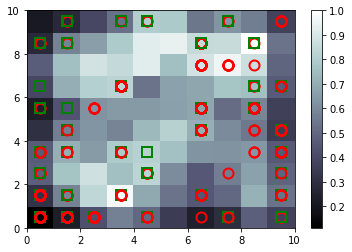

In [32]:
# Initialize the figure
bone()

# SOM with all teh different colours corresponding to the Mean Interneuron Distances 
pcolor(som.distance_map().T)

# Adding Legend
colorbar() 

markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None', 
       markersize = 10,
       markeredgewidth = 2)

show()

### Finding the frauds

In [33]:
mappings = som.win_map(X)

In [34]:
mappings

defaultdict(list,
            {(0,
              0): [array([0.64370578, 1.        , 0.05518797, 0.23214286, 0.5       ,
                     0.15384615, 0.375     , 0.00438596, 0.        , 0.        ,
                     0.        , 0.        , 0.5       , 0.03      , 0.001     ]), array([0.39333838, 1.        , 0.21172932, 0.03571429, 0.        ,
                     0.07692308, 0.875     , 0.10526316, 0.        , 0.        ,
                     0.        , 0.        , 0.5       , 0.088     , 0.00537   ]), array([8.08936888e-01, 1.00000000e+00, 9.39849624e-02, 4.46428571e-02,
                     0.00000000e+00, 2.30769231e-01, 3.75000000e-01, 4.38596491e-03,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                     5.00000000e-01, 7.00000000e-02, 4.00000000e-05]), array([5.83560580e-01, 1.00000000e+00, 1.31578947e-01, 4.46428571e-03,
                     0.00000000e+00, 2.30769231e-01, 3.75000000e-01, 4.38596491e-03,
                

In [43]:
frauds = np.concatenate((mappings[(3,1)], mappings[(8,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [46]:
frauds

array([[1.5608595e+07, 0.0000000e+00, 3.0420000e+01, 1.3750000e+00,
        2.0000000e+00, 9.0000000e+00, 8.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 1.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 3.4000000e+01],
       [1.5761158e+07, 0.0000000e+00, 1.6500000e+01, 1.2500000e+00,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 2.5000000e-01,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0800000e+02, 9.9000000e+01],
       [1.5711742e+07, 0.0000000e+00, 2.3000000e+01, 1.8350000e+00,
        2.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.0000000e+02, 5.4000000e+01],
       [1.5666166e+07, 0.0000000e+00, 2.0080000e+01, 1.2500000e-01,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00,